In [1]:
import os

folder_main = '/Users/nikhilvarma/Downloads/MoreFlowers'
folder_flowers = ['Training/Dandelion', 'Training/Rose', 'Training/Sunflower', 'Training/Tulip',
              'Testing/Dandelion', 'Testing/Rose', 'Testing/Sunflower', 'Testing/Tulip']

for folder in folder_flowers:
    folder_path = os.path.join(folder_main, folder)
    images = len(os.listdir(folder_path))

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


training_dir = "/Users/nikhilvarma/Downloads/MoreFlowers/Training"
testing_dir = "/Users/nikhilvarma/Downloads/MoreFlowers/Testing"


batch_size = 32
img_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training data
training_data = train_datagen.flow_from_directory(
    training_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

# Loading the testing data
testing_data = test_datagen.flow_from_directory(
    testing_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

2023-04-25 00:27:15.264545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 560 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, and activation function of ReLU
    tf.keras.layers.Conv2D(
        32, 
        (3, 3), 
        activation='relu', 
        input_shape=(224, 224, 3)
    ),
    # Max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, kernel size of 3x3, and activation function of ReLU
    tf.keras.layers.Conv2D(
        64, 
        (3, 3), 
        activation='relu'
    ),
    # Max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Dense layer with 4 units and activation function of softmax
    tf.keras.layers.Dense(
        4, 
        activation='softmax'
    )
])

2023-04-25 00:27:18.491072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [5]:
history = model.fit(
training_data,
steps_per_epoch=len(training_data),
epochs=10,
validation_data=testing_data,
validation_steps=len(testing_data),
verbose=1
)

Epoch 1/10
18/18 [==============================] - 9s 477ms/step - loss: 2.9174 - accuracy: 0.3768 - val_loss: 1.3559 - val_accuracy: 0.3750
Epoch 2/10
18/18 [==============================] - 8s 457ms/step - loss: 0.9983 - accuracy: 0.5375 - val_loss: 1.4832 - val_accuracy: 0.4625
Epoch 3/10
18/18 [==============================] - 8s 458ms/step - loss: 0.7904 - accuracy: 0.6839 - val_loss: 1.5118 - val_accuracy: 0.4750
Epoch 4/10
18/18 [==============================] - 8s 465ms/step - loss: 0.6997 - accuracy: 0.7429 - val_loss: 1.3491 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 9s 485ms/step - loss: 0.4845 - accuracy: 0.8321 - val_loss: 1.5562 - val_accuracy: 0.4625
Epoch 6/10
18/18 [==============================] - 9s 476ms/step - loss: 0.3652 - accuracy: 0.8946 - val_loss: 1.4436 - val_accuracy: 0.5375
Epoch 7/10
18/18 [==============================] - 9s 476ms/step - loss: 0.2114 - accuracy: 0.9446 - val_loss: 1.5829 - val_accuracy: 0.4750
Epoch 

In [6]:

test_loss, test_acc = model.evaluate(
    testing_data, 
    steps=len(testing_data)
)

print("Test accuracy:", test_acc)

3/3 [==============================] - 0s 109ms/step - loss: 2.0511 - accuracy: 0.4875
Test accuracy: 0.48750001192092896


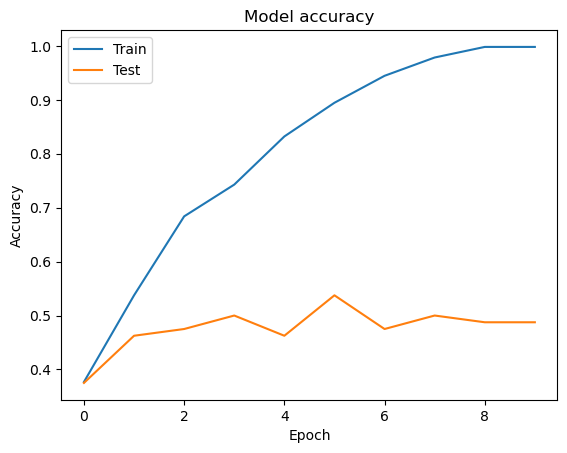

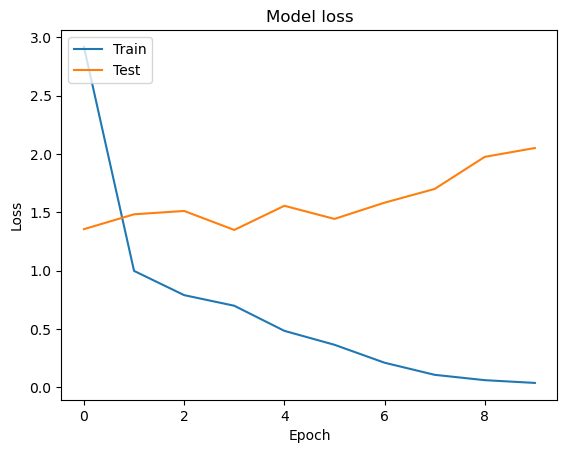

In [7]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 106ms/step


<AxesSubplot:>

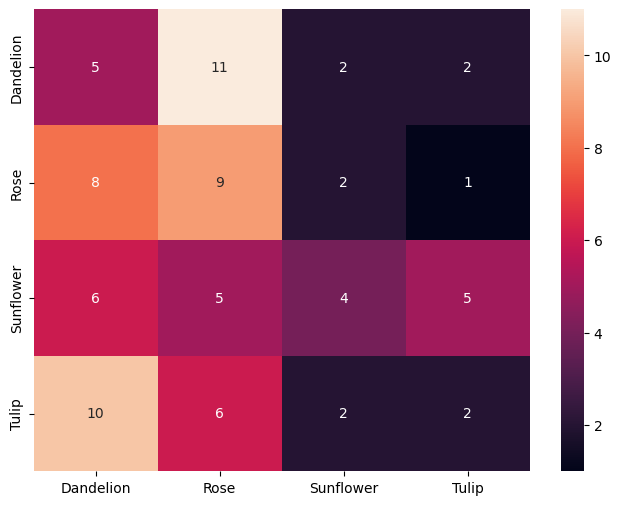

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(testing_data), axis=-1)

y_true = testing_data.classes

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]],
                  columns = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]])
plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [9]:
from PIL import Image
import os

folder_main = '/Users/chandanatangellapally/Downloads/MoreFlowers'
flower_folders = ['Training/Dandelion', 'Training/Rose', 'Training/Sunflower', 'Training/Tulip']

for folder in flower_folders:
    folder_path = os.path.join(folder_main, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
            
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as image:
                flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
                flipped_image_path = os.path.join(folder_path, 'flipped_'+filename)
                flipped_image.save(flipped_image_path)

/var/folders/bv/64yjzp0x0q3_7ncz30504wc00000gn/T/ipykernel_2264/567962790.py:14: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)


In [10]:

datagen = ImageDataGenerator(rescale=1./255)

training_data = datagen.flow_from_directory(
    '/Users/chandanatangellapally/Downloads/MoreFlowers/Training',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 840 images belonging to 4 classes.


In [11]:
model = tf.keras.models.Sequential([
    # Convolutional layer with 32 filters, kernel size of 3x3, and activation function of ReLU
    tf.keras.layers.Conv2D(
        32, 
        (3, 3), 
        activation='relu', 
        input_shape=(224, 224, 3)
    ),
    #  Max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, kernel size of 3x3, and activation function of ReLU
    tf.keras.layers.Conv2D(
        64, 
        (3, 3), 
        activation='relu'
    ),
    # Max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Dense layer with 4 units and activation function of softmax

    tf.keras.layers.Dense(
        4, 
        activation='softmax'
    )
])

In [12]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [13]:
history = model.fit(
training_data,
steps_per_epoch=len(training_data),
epochs=10,
validation_data=testing_data,
validation_steps=len(testing_data),
verbose=1
)

Epoch 1/10
27/27 [==============================] - 13s 471ms/step - loss: 2.0002 - accuracy: 0.4631 - val_loss: 1.3114 - val_accuracy: 0.5125
Epoch 2/10
27/27 [==============================] - 13s 474ms/step - loss: 0.6781 - accuracy: 0.7500 - val_loss: 1.3921 - val_accuracy: 0.5125
Epoch 3/10
27/27 [==============================] - 13s 487ms/step - loss: 0.4171 - accuracy: 0.8679 - val_loss: 1.5344 - val_accuracy: 0.5500
Epoch 4/10
27/27 [==============================] - 13s 492ms/step - loss: 0.1585 - accuracy: 0.9631 - val_loss: 1.6615 - val_accuracy: 0.5125
Epoch 5/10
27/27 [==============================] - 13s 493ms/step - loss: 0.1021 - accuracy: 0.9750 - val_loss: 1.8308 - val_accuracy: 0.5000
Epoch 6/10
27/27 [==============================] - 13s 492ms/step - loss: 0.0520 - accuracy: 0.9952 - val_loss: 2.0698 - val_accuracy: 0.4750
Epoch 7/10
27/27 [==============================] - 14s 502ms/step - loss: 0.0196 - accuracy: 0.9964 - val_loss: 2.1550 - val_accuracy: 0.5000

In [14]:

test_loss, test_acc = model.evaluate(
    testing_data, 
    steps=len(testing_data)
)

print("Test accuracy:", test_acc)

3/3 [==============================] - 0s 112ms/step - loss: 2.5626 - accuracy: 0.5125
Test accuracy: 0.512499988079071


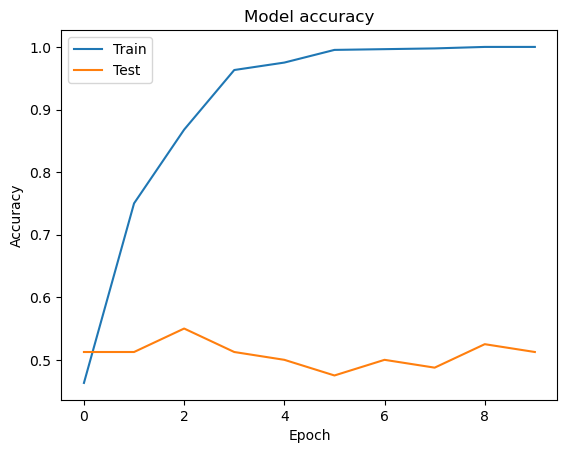

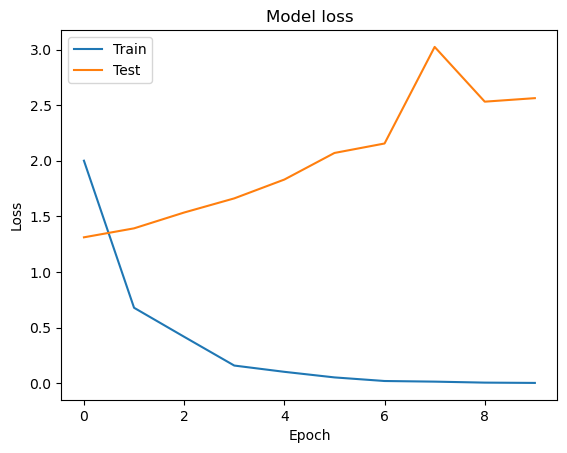

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 110ms/step


<AxesSubplot:>

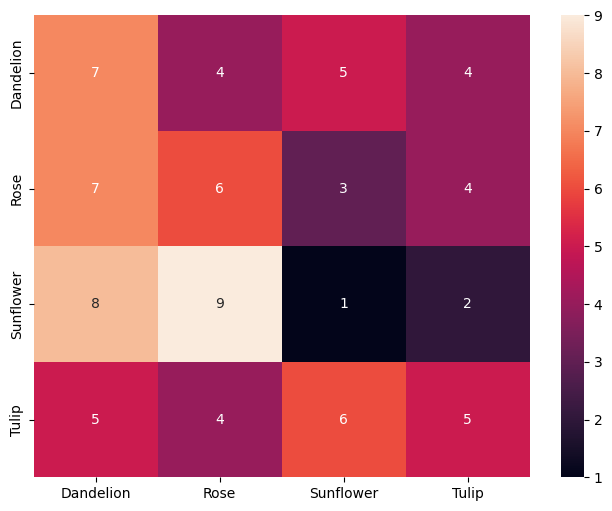

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(testing_data), axis=-1)

y_true = testing_data.classes

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]],
                  columns = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]])
plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    shear_range=0.2, 
)

training_data = train_datagen.flow_from_directory(
    '/Users/chandanatangellapally/Downloads/MoreFlowers/Training',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=True 
)

Found 840 images belonging to 4 classes.


In [18]:
model = tf.keras.models.Sequential([
    
    # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # Max pooling layer with a pool size of 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, kernel size of 3x3, and activation function of ReLU
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer 2
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten layer
    tf.keras.layers.Flatten(),
    # Dense layer with 4 units and activation function of softmax
    tf.keras.layers.Dense(
        4, 
        activation='softmax'
    )
])

In [19]:

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [20]:
history = model.fit(
training_data,
steps_per_epoch=len(training_data),
epochs=5,
validation_data=testing_data,
validation_steps=len(testing_data),
verbose=1
)

Epoch 1/5
27/27 [==============================] - 16s 567ms/step - loss: 1.9482 - accuracy: 0.4119 - val_loss: 1.2705 - val_accuracy: 0.4250
Epoch 2/5
27/27 [==============================] - 15s 550ms/step - loss: 0.9335 - accuracy: 0.6119 - val_loss: 1.1472 - val_accuracy: 0.5500
Epoch 3/5
27/27 [==============================] - 15s 546ms/step - loss: 0.7314 - accuracy: 0.7190 - val_loss: 1.3254 - val_accuracy: 0.5000
Epoch 4/5
27/27 [==============================] - 15s 558ms/step - loss: 0.5797 - accuracy: 0.7702 - val_loss: 1.4089 - val_accuracy: 0.4875
Epoch 5/5
27/27 [==============================] - 15s 559ms/step - loss: 0.4968 - accuracy: 0.8107 - val_loss: 1.6015 - val_accuracy: 0.5625


In [21]:

test_loss, test_acc = model.evaluate(
    testing_data, 
    steps=len(testing_data)
)

print("Test accuracy:", test_acc)

3/3 [==============================] - 0s 116ms/step - loss: 1.6015 - accuracy: 0.5625
Test accuracy: 0.5625


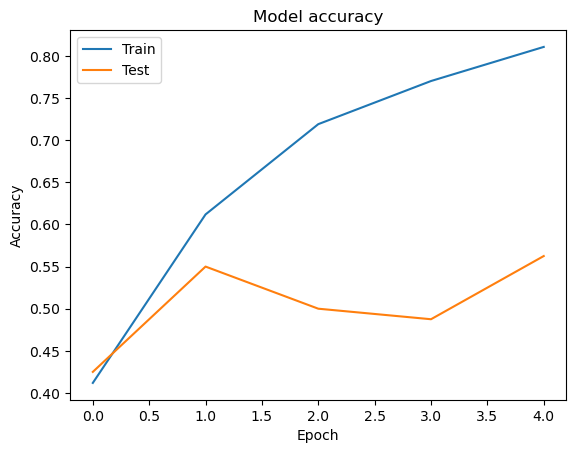

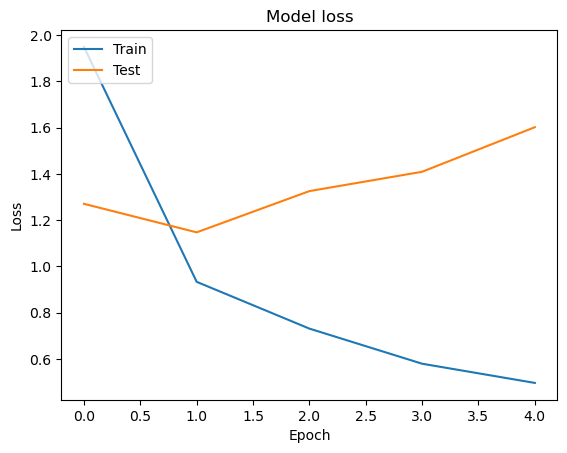

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

3/3 [==============================] - 0s 118ms/step


<AxesSubplot:>

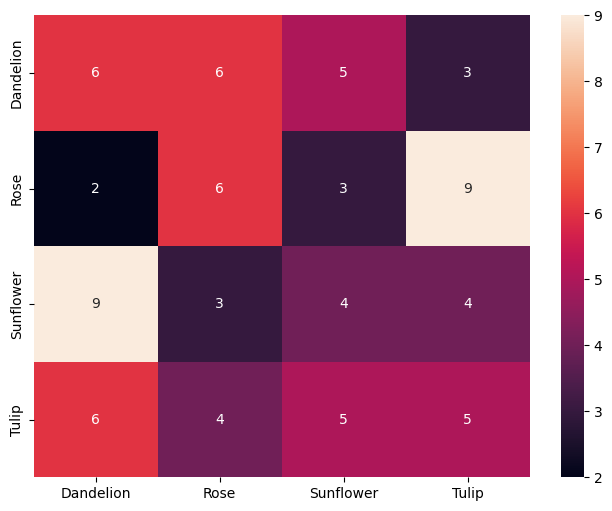

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(testing_data), axis=-1)

y_true = testing_data.classes

cm = confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]],
                  columns = [i for i in ["Dandelion", "Rose", "Sunflower", "Tulip"]])
plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)